### This example shows how to visualize two columns of data

Note: the documentation of the four functions in the example is [here](../docs/two_columns.md).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import plot_utils as pu

In [3]:
%matplotlib inline

### Load the "Titanic" dataset

The "Titanic" dataset is downloaded from: http://biostat.mc.vanderbilt.edu/wiki/Main/DataSets

In [4]:
titanic = pd.read_csv('./datasets/titanic3.csv')
titanic.rename(index=str, columns={'pclass':'ticket_class'}, inplace=True)
titanic['embarked'] = titanic['embarked'].map(
    {'S':'Southampton', 'C':'Cherbourg', 'Q':'Queenstown'}
)

In [5]:
titanic.head()

,ticket_class,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,Southampton,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Titanic's ticket prices versus people's ages?

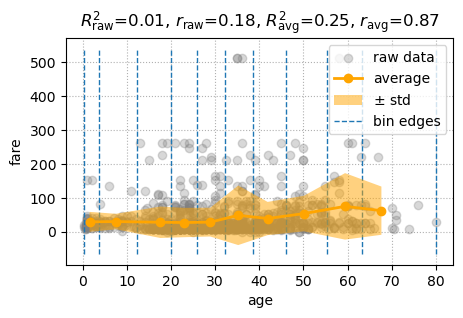

In [6]:
pu.bin_and_mean(titanic['age'], titanic['fare'], figsize=(5,3));

### Are ticket prices to Titanic different between classes?

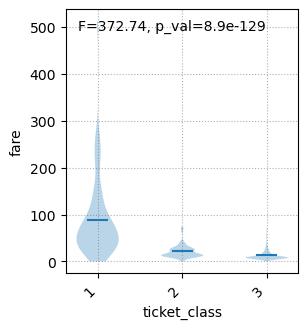

In [7]:
pu.category_means(titanic['ticket_class'], titanic['fare']);

### Are the passengers' survival rates different between ticket classes?

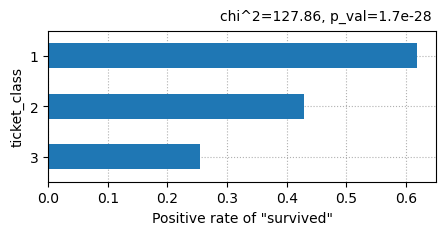

In [8]:
pu.positive_rate(titanic['ticket_class'], titanic['survived'], figsize=(5,2));

### Do passengers embarking from different ports belong to different social classes?

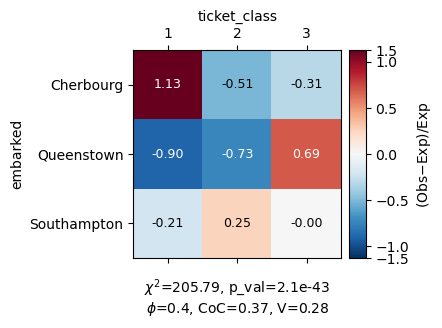

In [9]:
pu.contingency_table(titanic['ticket_class'], titanic['embarked'], dropna=True, rot=0);

### Do passengers embarking from different ports have different survival rates?

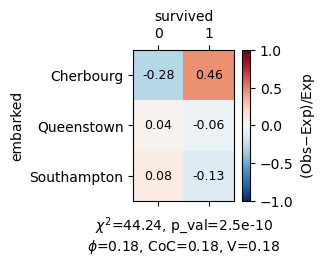

In [10]:
pu.contingency_table(titanic['survived'], titanic['embarked'], dropna=True, rot=0);

### More examples on `bin-and-mean`:

You can specify the number of bins desired. The bin edges are automatically calculated from the quantiles of the x values.

(An plotting option is `show_SE`, which, if turned on, can show the standard error instead of standard deviation within each bin.)

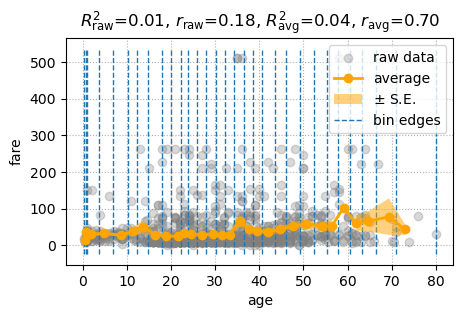

In [11]:
pu.bin_and_mean(titanic['age'], titanic['fare'], figsize=(5,3), bins=30, show_SE=True);

Or you can manually specify bin edges, for more precise control:

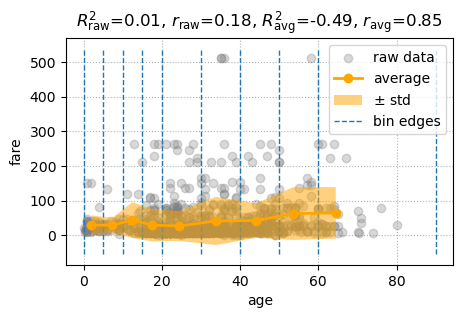

In [12]:
pu.bin_and_mean(
    titanic['age'], 
    titanic['fare'], 
    figsize=(5, 3),
    bins=[0, 5, 10, 15, 20, 30, 40, 50, 60, 90],
);

Or you can change the scale of x (or y) axis to be log:

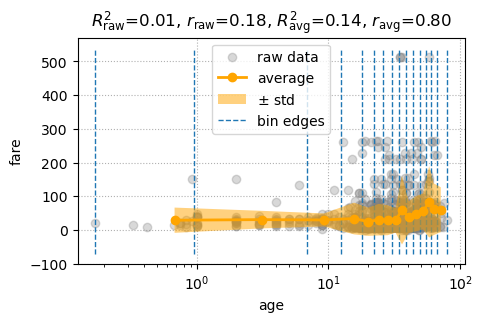

In [13]:
pu.bin_and_mean(
    titanic['age'], 
    titanic['fare'], 
    figsize=(5, 3),
    bins=15, 
    logx=True,
);

Also, you can show the error bound as error bars, instead of shades (or even turn off error bounds):

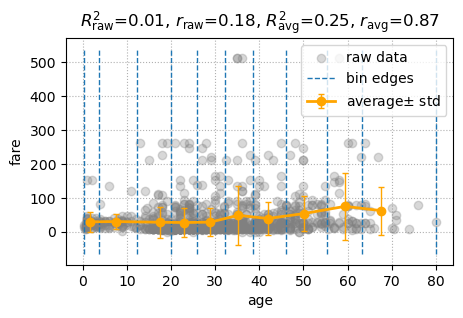

In [14]:
pu.bin_and_mean(titanic['age'], titanic['fare'], figsize=(5,3), err_bound_type='bar');

For more detailed usage, please refer to the document of this function [here](../docs/two_columns.md).

### More examples on `contingency_table`:

Show the contingency table as absolute values (by setting `normalize` to `False`). This way, the actual observed instances are shown, instead of the "relative difference between observed and expected".

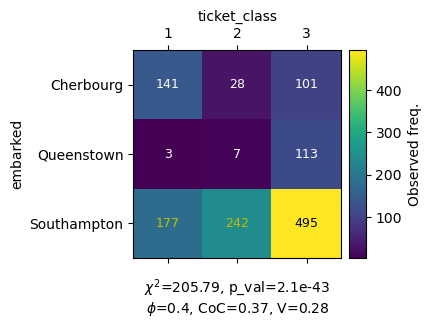

In [15]:
pu.contingency_table(titanic['ticket_class'], titanic['embarked'], dropna=True, rot=0, normalize=False);

You can set `dropna` to `False`, so that NaN values are treated as another category and shown in the table:

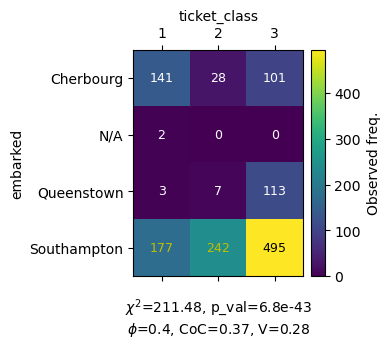

In [16]:
pu.contingency_table(titanic['ticket_class'], titanic['embarked'], dropna=False, rot=0, normalize=False);